In [1]:
import os
import zipfile
import requests 

import pandas as pd
import yahoofinancials as yf

from fredapi import Fred
from datetime import datetime

In [2]:
FredAPI = 'secret'

In [3]:
def get_fred_data(tickers):
    fred = Fred(api_key=FredAPI)
    df = pd.DataFrame()

    tickerslist = tickers.keys() if isinstance(tickers,dict) else tickers

    for tick in tickerslist :
        temp = fred.get_series(tick)
        temp.name = tickers[tick] if isinstance(tickers,dict) else tick
        df=df.merge(temp,how='outer',left_index=True, right_index=True)
    return df

def get_hist_price_data(symbol, start_date, end_date, time_interval):
    obj = yf.YahooFinancials(symbol)
    data = obj.get_historical_price_data(start_date=start_date, end_date=end_date, time_interval=time_interval)
    data = pd.DataFrame.from_dict(data[symbol]['prices'])
    data = data.set_index('formatted_date')
    
    return data

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

In [4]:
tickers =  {'DGS1':'1-Year Treasury Constant Maturity Rate',
            'DGS5':'5-Year Treasury Constant Maturity Rate',
            'DGS10':'10-Year Treasury Constant Maturity Rate',
            'DGS20':'20-Year Treasury Constant Maturity Rate',
            'DTWEXM':'Trade Weighted U.S. Dollar Index: Major Currencies, Goods (DISCONTINUED)',
            'DTWEXAFEGS': 'Trade Weighted U.S. Dollar Index: Advanced Foreign Economies, Goods and Services',
            'VIXCLS':'CBOE Volatility Index: VIX',
            'UMCSENT':'University of Michigan: Consumer Sentiment',
            'STLFSI2':'St. Louis Fed Financial Stress Index',
            'UNRATE':'Unemployment Rate',
            'ICSA':'Initial Claims',
            'CPIAUCSL':'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average',
            'MICH':'University of Michigan: Inflation Expectation'}

<h1>Exploring the Data</h1>

1-Year Treasury Constant Maturity Rate (DGS1) <br>
Units:  Percent, Not Seasonally Adjusted <br>
Frequency:  Daily

<AxesSubplot:>

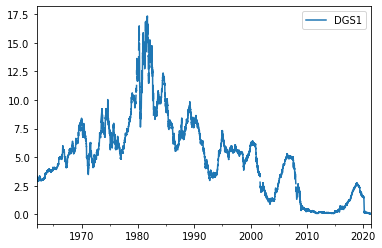

In [5]:
ts = get_fred_data(['DGS1'])
ts.plot()

In [6]:
ts

,DGS1
1962-01-02,3.22
1962-01-03,3.24
1962-01-04,3.24
1962-01-05,3.26
1962-01-08,3.31
...,...
2021-06-16,0.08
2021-06-17,0.08
2021-06-18,0.09
2021-06-21,0.09


In [7]:
del ts

5-Year Treasury Constant Maturity Rate (DGS5) <br>
Units:  Percent, Not Seasonally Adjusted <br>
Frequency:  Daily

<AxesSubplot:>

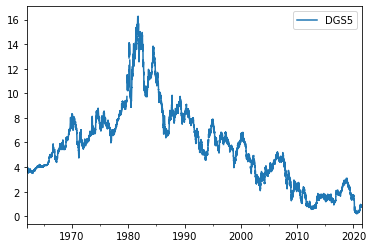

In [8]:
ts = get_fred_data(['DGS5'])
ts.plot()

In [9]:
ts

,DGS5
1962-01-02,3.88
1962-01-03,3.87
1962-01-04,3.86
1962-01-05,3.89
1962-01-08,3.91
...,...
2021-06-16,0.89
2021-06-17,0.90
2021-06-18,0.89
2021-06-21,0.90


In [10]:
del ts

10-Year Treasury Constant Maturity Rate (DGS10) <br>
Units:  Percent, Not Seasonally Adjusted <br>
Frequency:  Daily

<AxesSubplot:>

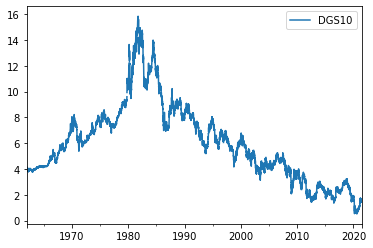

In [11]:
ts = get_fred_data(['DGS10'])
ts.plot()

In [12]:
ts

,DGS10
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2021-06-16,1.57
2021-06-17,1.52
2021-06-18,1.45
2021-06-21,1.50


In [13]:
del ts

20-Year Treasury Constant Maturity Rate (DGS20) <br>
Units:  Percent, Not Seasonally Adjusted <br>
Frequency:  Daily

<AxesSubplot:>

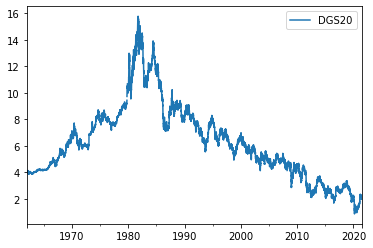

In [14]:
ts = get_fred_data(['DGS20'])
ts.plot()

In [15]:
ts

,DGS20
1962-01-02,4.07
1962-01-03,4.07
1962-01-04,4.06
1962-01-05,4.07
1962-01-08,4.08
...,...
2021-06-16,2.13
2021-06-17,2.05
2021-06-18,1.97
2021-06-21,2.05


In [16]:
del ts

SP500 Index  
https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPCv

<AxesSubplot:xlabel='formatted_date'>

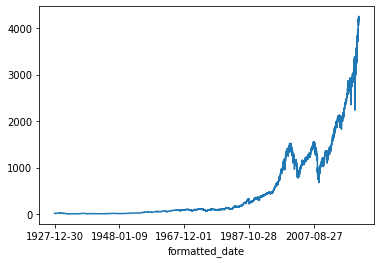

In [17]:
sp500_data = get_hist_price_data('^GSPC', '1900-12-31', datetime.today().strftime('%Y-%m-%d'), 'daily')
sp500_data['adjclose'].plot()

In [18]:
sp500_data

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
1927-12-30,-1325583000,17.660000,17.660000,17.660000,17.660000,0,17.660000
1928-01-03,-1325237400,17.760000,17.760000,17.760000,17.760000,0,17.760000
1928-01-04,-1325151000,17.719999,17.719999,17.719999,17.719999,0,17.719999
1928-01-05,-1325064600,17.549999,17.549999,17.549999,17.549999,0,17.549999
1928-01-06,-1324978200,17.660000,17.660000,17.660000,17.660000,0,17.660000
...,...,...,...,...,...,...,...
2021-06-16,1623850200,4251.890137,4202.450195,4248.870117,4223.700195,3722050000,4223.700195
2021-06-17,1623936600,4232.290039,4196.049805,4220.370117,4221.859863,3952110000,4221.859863
2021-06-18,1624023000,4204.779785,4164.399902,4204.779785,4166.450195,6084980000,4166.450195


In [19]:
del sp500_data

Trade Weighted U.S. Dollar Index: Major Currencies, Goods (DISCONTINUED) (DTWEXM) <br>
Units:  Index Mar 1973=100, Not Seasonally Adjusted <br>
Frequency:  Daily <br>
A weighted average of the foreign exchange value of the U.S. dollar against a subset of the broad index currencies that circulate widely outside the country of issue.Major currencies index includes the Euro Area, Canada, Japan, United Kingdom, Switzerland, Australia, and Sweden. For more information about trade-weighted indexes visit the Board of Governors.<br>
This series will no longer be updated. This series is the suggested substitute, DTWEXAFEGS. https://fred.stlouisfed.org/series/DTWEXAFEGS <br>
<br>
Trade Weighted U.S. Dollar Index: Advanced Foreign Economies, Goods and Services (DTWEXAFEGS)<br>
Units:  Index Jan 2006=100, Not Seasonally Adjusted <br>
Frequency:  Daily

<AxesSubplot:>

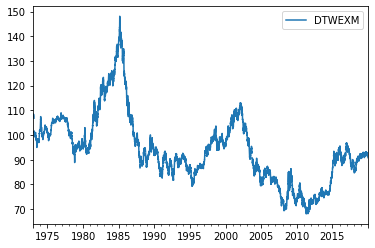

In [20]:
ts1 = get_fred_data(['DTWEXM'])
ts1.plot()

<AxesSubplot:>

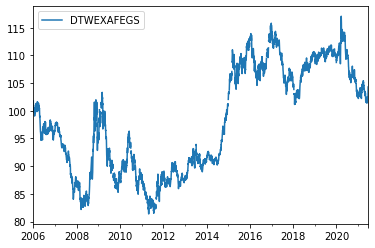

In [21]:
ts2 = get_fred_data(['DTWEXAFEGS'])
ts2.plot()

In [22]:
ts1

,DTWEXM
1973-01-02,108.2242
1973-01-03,108.2934
1973-01-04,108.2632
1973-01-05,108.2548
1973-01-08,108.3818
...,...
2019-12-25,NaN
2019-12-26,91.9234
2019-12-27,91.4593
2019-12-30,91.1403


In [23]:
ts2

,DTWEXAFEGS
2006-01-02,101.7857
2006-01-03,100.6967
2006-01-04,100.0512
2006-01-05,100.2697
2006-01-06,99.8965
...,...
2021-06-14,102.2002
2021-06-15,102.4448
2021-06-16,102.2976
2021-06-17,103.8428


In [24]:
del ts1 
del ts2

CBOE Volatility Index: VIX (VIXCLS)<br>
Units:  Index, Not Seasonally Adjusted<br>
Frequency:  Daily, Close<br>
VIX measures market expectation of near term volatility conveyed by stock index option prices. Copyright, 2016, Chicago Board Options Exchange, Inc. Reprinted with permission. <br>

<AxesSubplot:>

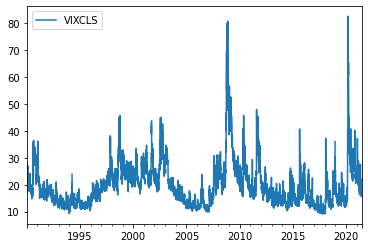

In [25]:
ts = get_fred_data(['VIXCLS'])
ts.plot()

In [26]:
ts

,VIXCLS
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2021-06-16,18.15
2021-06-17,17.75
2021-06-18,20.70
2021-06-21,17.89


In [27]:
del ts

University of Michigan: Consumer Sentiment (DISCONTINUED) (UMCSENT1) <br>
Units:  Index 1966:Q1=100, Not Seasonally Adjusted <br>
Frequency:  Not Applicable <br>
Please see FRED data series UMCSENT for monthly data beginning in January 1978. <br>

University of Michigan: Consumer Sentiment (UMCSENT) <br>
Units:  Index 1966:Q1=100, Not Seasonally Adjusted <br>
Frequency:  Monthly <br>
At the request of the source, the data is delayed by 1 month. To obtain historical data prior to January 1978, please see FRED data series UMCSENT1. <br>

<AxesSubplot:>

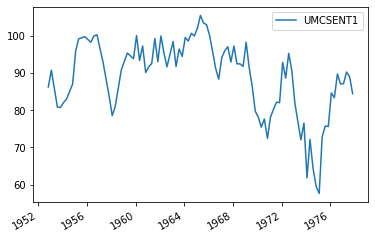

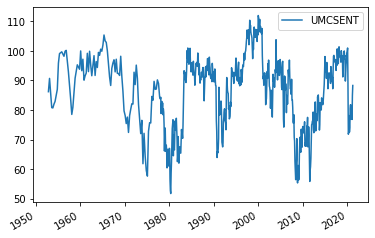

In [28]:
ts1 = get_fred_data(['UMCSENT1'])
ts2 = get_fred_data(['UMCSENT']).dropna()
ts1.plot()
ts2.plot()

In [29]:
ts1

,UMCSENT1
1952-11-01,86.2
1953-02-01,90.7
1953-08-01,80.8
1953-11-01,80.7
1954-02-01,82.0
...,...
1976-11-01,87.0
1977-02-01,87.1
1977-05-01,90.2
1977-08-01,89.0


In [30]:
ts2

,UMCSENT
1952-11-01,86.2
1953-02-01,90.7
1953-08-01,80.8
1953-11-01,80.7
1954-02-01,82.0
...,...
2020-12-01,80.7
2021-01-01,79.0
2021-02-01,76.8
2021-03-01,84.9


In [31]:
del ts1 
del ts2

St. Louis Fed Financial Stress Index (STLFSI2)<br>
Frequency:  Weekly, Ending Friday<br>
The STLFSI2 measures the degree of financial stress in the markets and is constructed from 18 weekly data series, all of which are weekly averages of daily data series: seven interest rates, six yield spreads, and five other indicators. Each of these variables captures some aspect of financial stress. Accordingly, as the level of financial stress in the economy changes, the data series are likely to move together.<br>
How to Interpret the Index:<br>
The average value of the index, which begins in late 1993, is designed to be zero. Thus, zero is viewed as representing normal financial market conditions. Values below zero suggest below-average financial market stress, while values above zero suggest above-average financial market stress.

<AxesSubplot:>

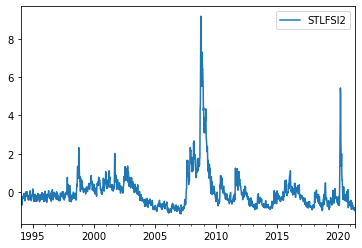

In [32]:
ts = get_fred_data(['STLFSI2'])
ts.plot()

In [33]:
ts

,STLFSI2
1993-12-31,-0.3894
1994-01-07,-0.5012
1994-01-14,-0.2170
1994-01-21,-0.4753
1994-01-28,-0.3180
...,...
2021-05-14,-0.8648
2021-05-21,-0.8505
2021-05-28,-0.9684
2021-06-04,-1.0054


In [34]:
del ts

Unemployment Rate (UNRATE)<br>
Units:  Percent, Seasonally Adjusted<br>
Frequency:  Monthly<br>
The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.<br>
This rate is also defined as the U-3 measure of labor underutilization.<br>
The series comes from the 'Current Population Survey (Household Survey)'<br>

<AxesSubplot:>

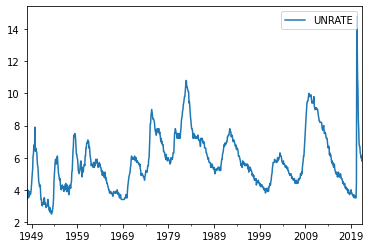

In [35]:
ts = get_fred_data(['UNRATE'])
ts.plot()

In [36]:
ts

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2021-01-01,6.3
2021-02-01,6.2
2021-03-01,6.0
2021-04-01,6.1


In [37]:
del ts

Initial Claims (ICSA)<br>
Units:  Number, Seasonally Adjusted<br>
Frequency:  Weekly, Ending Saturday<br>
An initial claim is a claim filed by an unemployed individual after a separation from an employer. The claim requests a determination of basic eligibility for the Unemployment Insurance program.

<AxesSubplot:>

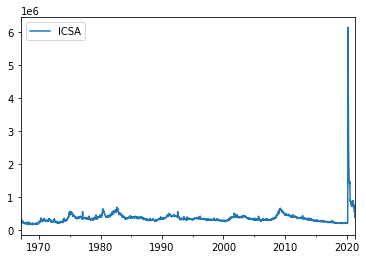

In [38]:
ts = get_fred_data(['ICSA'])
ts.plot()

In [39]:
ts

,ICSA
1967-01-07,208000.0
1967-01-14,207000.0
1967-01-21,217000.0
1967-01-28,204000.0
1967-02-04,216000.0
...,...
2021-05-15,444000.0
2021-05-22,405000.0
2021-05-29,388000.0
2021-06-05,375000.0


In [40]:
del ts

Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)<br>
Units:  Index 1982-1984=100, Seasonally Adjusted<br>
Frequency:  Monthly<br>
The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a measure of the average monthly change in the price for goods and services paid by urban consumers between any two time periods. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force.<br>
The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas. To calculate the index, price changes are averaged with weights representing their importance in the spending of the particular group. The index measures price changes (as a percent change) from a predetermined reference date. In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted CPI, which removes the effects of seasonal changes, such as weather, school year, production cycles, and holidays.<br>
The CPI can be used to recognize periods of inflation and deflation. Significant increases in the CPI within a short time frame might indicate a period of inflation, and significant decreases in CPI within a short time frame might indicate a period of deflation. However, because the CPI includes volatile food and oil prices, it might not be a reliable measure of inflationary and deflationary periods. For a more accurate detection, the core CPI (CPILFESL) is often used. When using the CPI, please note that it is not applicable to all consumers and should not be used to determine relative living costs. Additionally, the CPI is a statistical measure vulnerable to sampling error since it is based on a sample of prices and not the complete average.<br>

<AxesSubplot:>

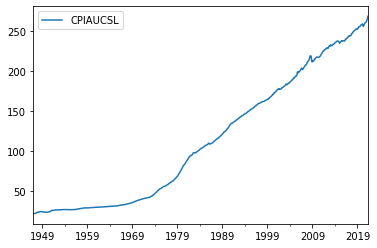

In [41]:
ts = get_fred_data(['CPIAUCSL'])
ts.plot()

In [42]:
ts

,CPIAUCSL
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2021-01-01,262.231
2021-02-01,263.161
2021-03-01,264.793
2021-04-01,266.832


In [43]:
del ts

University of Michigan: Inflation Expectation (MICH)<br>
Units:  Percent, Not Seasonally Adjusted<br>
Frequency:  Monthly<br>
Median expected price change next 12 months, Surveys of Consumers. The most recent value is not shown due to an agreement with the source.

<AxesSubplot:>

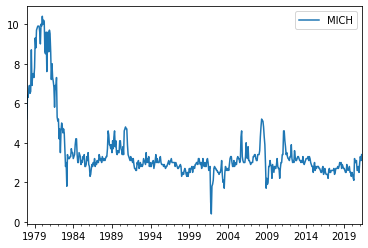

In [44]:
ts = get_fred_data(['MICH'])
ts.plot()

In [45]:
ts

,MICH
1978-01-01,5.2
1978-02-01,6.4
1978-03-01,6.3
1978-04-01,6.7
1978-05-01,6.9
...,...
2020-12-01,2.5
2021-01-01,3.0
2021-02-01,3.3
2021-03-01,3.1


In [46]:
del ts

Smoothed U.S. Recession Probabilities (RECPROUSM156N)<br>
Units:  Percent, Not Seasonally Adjusted<br>
Frequency:  Monthly<br>
Smoothed recession probabilities for the United States are obtained from a dynamic-factor markov-switching model applied to four monthly coincident variables: non-farm payroll employment, the index of industrial production, real personal income excluding transfer payments, and real manufacturing and trade sales. This model was originally developed in Chauvet, M., "An Economic Characterization of Business Cycle Dynamics with Factor Structure and Regime Switching," International Economic Review, 1998, 39, 969-996.

<AxesSubplot:>

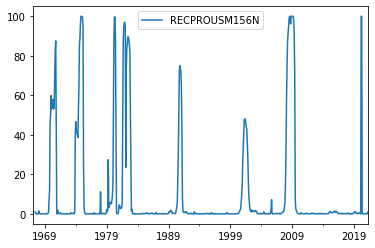

In [47]:
ts = get_fred_data(['RECPROUSM156N'])
ts.plot()

In [48]:
ts

,RECPROUSM156N
1967-02-01,NaN
1967-03-01,NaN
1967-04-01,NaN
1967-05-01,NaN
1967-06-01,1.08
...,...
2020-12-01,0.22
2021-01-01,0.02
2021-02-01,0.00
2021-03-01,0.00


In [49]:
del ts

In [50]:
zip_file_name = './5_factor_model.zip'
directory_to_extract_to = './data'
download_url('http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip', save_path=zip_file_name, chunk_size=128)
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
os.remove(zip_file_name)
    
zip_file_name = './momentum_factor.zip'
directory_to_extract_to = './data'
download_url('http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Momentum_Factor_daily_CSV.zip', save_path=zip_file_name, chunk_size=128)
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
os.remove(zip_file_name)

In [51]:
file = './data/F-F_Research_Data_5_Factors_2x3_daily.CSV'
factors = pd.read_csv(file,skiprows=4,names=['Date','Mkt-RF','SMB','HML','RMW','CMA','RF'],index_col='Date')
os.remove(file)

file = './data/F-F_Momentum_Factor_daily.CSV'
momentum = pd.read_csv(file,skiprows=14,names=['Date','Mom'],index_col='Date').iloc[:-1]
os.remove(file)

factors.index=factors.index.map(str)
momentum.index=momentum.index.map(str)

factors.index = pd.to_datetime(factors.index,format="%Y%m%d")
momentum.index = pd.to_datetime(momentum.index,format="%Y%m%d")

momentum = momentum.loc[momentum.index>=min(factors.index),:]

In [52]:
factors=pd.concat([factors,momentum],axis=1)
factors = factors.sort_index()
del momentum

<AxesSubplot:xlabel='Date'>

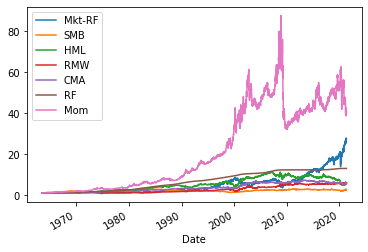

In [53]:
((factors.fillna(0)/100)+1).cumprod().plot()

In [54]:
dollar = get_fred_data(['DTWEXM','DTWEXAFEGS'])
dollar = dollar/dollar.shift(1)
dollar['DTWEXAFEGS'] = dollar['DTWEXAFEGS'].fillna(dollar['DTWEXM'])
dollar = dollar.drop(columns=['DTWEXM']).fillna(1)
dollar = dollar.cumprod()

In [55]:
ticks = [t for t in list(tickers.keys()) if t not in ['DTWEXM','DTWEXAFEGS']]

In [56]:
df = get_fred_data(ticks)
df = pd.concat([df,dollar])

In [57]:
m_df = df.resample('M').last()
m_df[['ICSA']] = df[['ICSA']].resample('M').sum()
m_factors = (((factors/100 +1).resample('M').prod() - 1)*100)

<AxesSubplot:xlabel='formatted_date'>

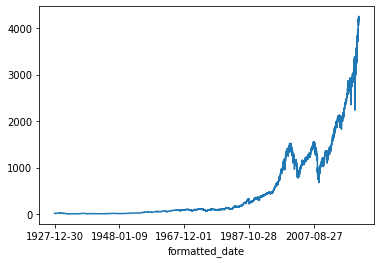

In [58]:
sp500_data = get_hist_price_data('^GSPC', '1900-12-31', datetime.today().strftime('%Y-%m-%d'), 'daily')
sp500_data = sp500_data[['high','low','open','close','volume','adjclose']]
sp500_data['adjclose'].plot()

<AxesSubplot:xlabel='formatted_date'>

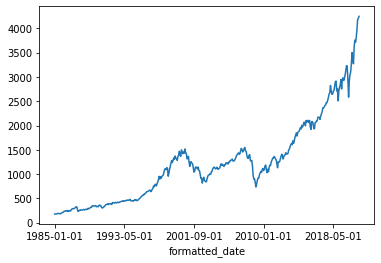

In [59]:
m_sp500_data = get_hist_price_data('^GSPC', '1900-12-31', datetime.today().strftime('%Y-%m-%d'), 'Monthly')
m_sp500_data = m_sp500_data[['high','low','open','close','volume','adjclose']]
m_sp500_data['adjclose'].plot()

In [60]:
sp500_data.to_csv('./data/sp500_data.csv')
m_sp500_data.to_csv('./data/monthly_sp500_data.csv')
factors.to_csv('./data/factor_data.csv')
m_factors.to_csv('./data/monthly_factor_data.csv')
df.to_csv('./data/predictor_data.csv')
m_df.to_csv('./data/monthly_predictor_data.csv')

In [61]:
factors

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
1963-07-01,-0.67,0.00,-0.34,-0.01,0.15,0.012,-0.21
1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.012,0.45
1963-07-03,0.63,-0.17,-0.10,0.17,-0.33,0.012,0.40
1963-07-05,0.40,0.08,-0.27,0.08,-0.33,0.012,0.06
1963-07-08,-0.63,0.04,-0.19,-0.29,0.13,0.012,-0.46
...,...,...,...,...,...,...,...
2021-04-26,0.43,0.76,-0.48,-1.26,-0.14,0.000,1.48
2021-04-27,-0.03,0.07,0.85,0.51,0.07,0.000,0.07
2021-04-28,-0.06,0.28,0.23,-0.33,-0.36,0.000,-0.16


In [62]:
m_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
1963-07-31,-0.402702,-0.461250,-0.949527,0.669357,-1.167930,0.264333,1.350522
1963-08-31,5.080130,-0.780493,1.679152,0.368838,-0.382403,0.242280,0.596692
1963-09-30,-1.572795,-0.424447,0.056538,-0.780222,0.146776,0.280373,-0.325989
1963-10-31,2.510140,-1.330383,0.067535,2.687004,-2.088133,0.299428,3.063741
1963-11-30,-0.848115,-0.893333,1.798037,-0.504467,2.224436,0.270345,-1.494239
...,...,...,...,...,...,...,...
2020-12-31,4.568834,4.549694,-1.398583,-2.047145,-0.059975,0.000000,-1.954898
2021-01-31,-0.036187,6.768425,2.803563,-3.185383,4.480195,0.000000,1.671962
2021-02-28,2.741740,4.437831,6.782957,-0.235995,-1.965141,0.000000,-5.773946


In [63]:
df

,DGS1,DGS5,DGS10,DGS20,VIXCLS,UMCSENT,STLFSI2,UNRATE,ICSA,CPIAUCSL,MICH,DTWEXAFEGS
1947-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.48,NaN,NaN
1947-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.62,NaN,NaN
1947-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN
1947-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.95,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.706585
2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708276
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.707259
2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.717942


In [64]:
m_df.pct_change()

,DGS1,DGS5,DGS10,DGS20,VIXCLS,UMCSENT,STLFSI2,UNRATE,ICSA,CPIAUCSL,MICH,DTWEXAFEGS
1947-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006518,NaN,NaN
1947-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017576,NaN,NaN
1947-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1947-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002273,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,-0.200000,0.666667,0.297297,0.238095,-0.155334,-0.027848,0.330810,-0.015873,-0.241753,0.003546,0.100000,0.000086
2021-03-31,-0.125000,0.226667,0.208333,0.110577,-0.305903,0.105469,0.201345,-0.032258,-0.103170,0.006202,-0.060606,0.017900
2021-04-30,-0.285714,-0.065217,-0.051724,-0.051948,-0.040722,0.040047,0.321136,0.016667,-0.139293,0.007700,0.096774,-0.019834
2021-05-31,0.000000,-0.081395,-0.042424,-0.004566,-0.099409,0.000000,0.051808,-0.049180,-0.105475,0.006442,0.000000,-0.012928
